# Vision Transformers

## 0. Import torch and check the GPU

In [1]:
import torch

print(torch.cuda.is_available())
print(torch.cuda.get_device_name(0))

True
NVIDIA GeForce RTX 3070


In [9]:
# def get_dataset(
#     url: str,
#     name_path_dataset: str,
#     data_path_name: str
# ):
#     """
#     Function to obtain the dataset on which the model trainings will be performed.

#     The function takes a download URL for a '.zip' file as input. It will create a 'data' folder where the data will be downloaded and will delete the '.zip' file afterward.

#     Args:
#         - url: A string containing the download URL of the data as a '.zip' file.
    
#     Returns:
#         - data_path: A variable containing Path(data_path_name).
#         - image_path: A variable containing data_path / name_path_dataset

#     Example:
#         get_dataset(
#            root="https://competitions.codalab.org/my/datasets/download/a26784fe-cf33-48c2-b61f-94b299dbc0f2",
#            name_path="sidd_small_dataset",
#            data_path_name="data/")
#     """
#     import os
#     import requests
#     import zipfile
#     from pathlib import Path

#     # Setup path to data folder
#     data_path = Path(data_path_name)
#     image_path = data_path / name_path_dataset

#     # If the image folder doesn't exist, download it and prepare it... 
#     if image_path.is_dir():
#         print(f"{image_path} directory exists.")
#     else:
#         print(f"Did not find {image_path} directory, creating one...")
#         image_path.mkdir(parents=True, exist_ok=True)
        
#         # Download sidd small dataset
#         with open(data_path / (name_path_dataset + ".zip"), "wb") as f:
#             request = requests.get(url)
#             print(f"Downloading {name_path_dataset} dataset...")
#             f.write(request.content)

#         # Unzip sidd small dataset
#         with zipfile.ZipFile(data_path / (name_path_dataset + ".zip"), "r") as zip_ref:
#             print(f"Unzipping {name_path_dataset} dataset...") 
#             zip_ref.extractall(image_path)
        
#         # Remove .zip file
#         os.remove(data_path / (name_path_dataset + ".zip"))
    
#     return data_path, image_path

## 1. Get the data

In [3]:
import os
import requests
import zipfile
from pathlib import Path

# Setup path to data folder
data_path = Path("data/")
image_path = data_path / "sidd_small_dataset/SIDD_Small_sRGB_Only/Data"

# SIDD Small Dataset URL
url = "https://competitions.codalab.org/my/datasets/download/a26784fe-cf33-48c2-b61f-94b299dbc0f2"

# If the image folder doesn't exist, download it and prepare it... 
if image_path.is_dir():
    print(f"{image_path} directory exists.")
else:
    print(f"Did not find {image_path} directory, creating one...")
    image_path.mkdir(parents=True, exist_ok=True)
        
    # Download sidd small dataset
    with open(data_path / "sidd_small_dataset.zip", "wb") as f:
        request = requests.get(url)
        print(f"Downloading sidd small dataset...")
        f.write(request.content)

    # Unzip sidd small dataset
    with zipfile.ZipFile(data_path / "sidd_small_dataset.zip", "r") as zip_ref:
        print(f"Unzipping sidd small dataset...") 
        zip_ref.extractall(image_path)
        
    # Remove .zip file
    os.remove(data_path / "sidd_small_dataset.zip")

data/sidd_small_dataset/SIDD_Small_sRGB_Only/Data directory exists.


In [9]:
# Listas para almacenar los paths de las imágenes GT y Noisy
image_gt_path_list = []
image_noisy_path_list = []

# Recorremos todas las carpetas
for folder in image_path.iterdir():
    if folder.is_dir():  # Asegurarnos de que sea una carpeta
        # Buscar la imagen GT
        gt_image = folder / "GT_SRGB_010.PNG"
        # Buscar la imagen Noisy
        noisy_image = folder / "NOISY_SRGB_010.PNG"
        
        # Verificar si ambas imágenes existen en la carpeta
        if gt_image.exists() and noisy_image.exists():
            # Añadir los paths a las listas correspondientes
            image_gt_path_list.append(gt_image)
            image_noisy_path_list.append(noisy_image)

# Mostramos los primeros 5 paths de cada lista para verificar
print("GT Image Paths:", image_gt_path_list[:5])
print("Noisy Image Paths:", image_noisy_path_list[:5])
print(f"GT Image Paths size: {len(image_gt_path_list)}")
print(f"Noisy Image Paths size: {len(image_noisy_path_list)}")

GT Image Paths: [PosixPath('data/sidd_small_dataset/SIDD_Small_sRGB_Only/Data/0140_006_IP_00800_00800_3200_L/GT_SRGB_010.PNG'), PosixPath('data/sidd_small_dataset/SIDD_Small_sRGB_Only/Data/0001_001_S6_00100_00060_3200_L/GT_SRGB_010.PNG'), PosixPath('data/sidd_small_dataset/SIDD_Small_sRGB_Only/Data/0094_005_N6_00100_00050_3200_L/GT_SRGB_010.PNG'), PosixPath('data/sidd_small_dataset/SIDD_Small_sRGB_Only/Data/0149_007_G4_00800_00800_4400_L/GT_SRGB_010.PNG'), PosixPath('data/sidd_small_dataset/SIDD_Small_sRGB_Only/Data/0126_006_S6_00400_00200_4400_L/GT_SRGB_010.PNG')]
Noisy Image Paths: [PosixPath('data/sidd_small_dataset/SIDD_Small_sRGB_Only/Data/0140_006_IP_00800_00800_3200_L/NOISY_SRGB_010.PNG'), PosixPath('data/sidd_small_dataset/SIDD_Small_sRGB_Only/Data/0001_001_S6_00100_00060_3200_L/NOISY_SRGB_010.PNG'), PosixPath('data/sidd_small_dataset/SIDD_Small_sRGB_Only/Data/0094_005_N6_00100_00050_3200_L/NOISY_SRGB_010.PNG'), PosixPath('data/sidd_small_dataset/SIDD_Small_sRGB_Only/Data/0149_

### 1.1. Visualize a random image

57
Random image path: data/sidd_small_dataset/SIDD_Small_sRGB_Only/Data/0102_005_S6_00400_00200_4400_L/GT_SRGB_010.PNG
Image height: 3000
Image width: 5328

Random image path: data/sidd_small_dataset/SIDD_Small_sRGB_Only/Data/0102_005_S6_00400_00200_4400_L/NOISY_SRGB_010.PNG
Image height: 3000
Image width: 5328


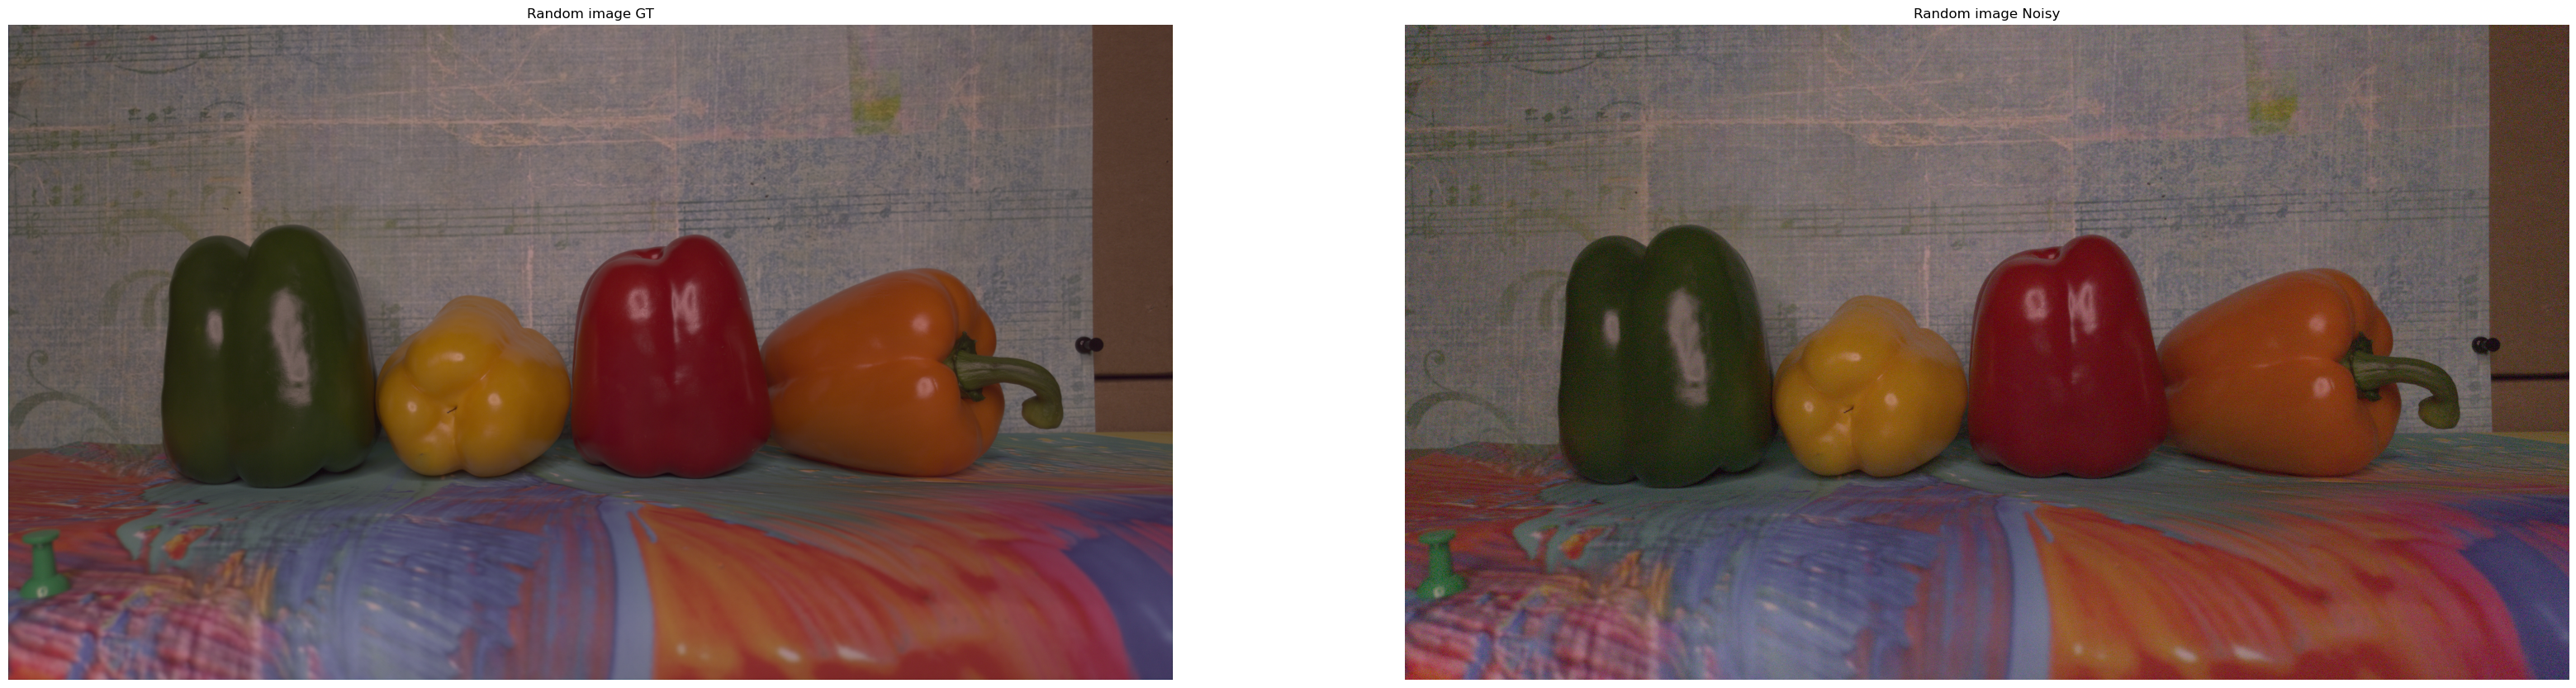

In [32]:
import random
from PIL import Image
from pathlib import Path
import matplotlib.pyplot as plt

# Set seed
# random.seed(42) # <- try changing this and see what happens
random_int = random.randint(0, 160)
print(random_int)

# Get random image path
random_image_gt_path = image_gt_path_list[random_int]
random_image_noisy_path = image_noisy_path_list[random_int]

# Open image
random_img_gt = Image.open(random_image_gt_path)
random_img_noisy = Image.open(random_image_noisy_path)

# Print metadata
print(f"Random image path: {random_image_gt_path}")
print(f"Image height: {random_img_gt.height}") 
print(f"Image width: {random_img_gt.width}\n")

# Print metadata
print(f"Random image path: {random_image_noisy_path}")
print(f"Image height: {random_img_noisy.height}") 
print(f"Image width: {random_img_noisy.width}")

# Visualize images
fig, axs = plt.subplots(1, 2, figsize=(40, 36))

# Image GT
axs[0].imshow(random_img_gt)
axs[0].set_title("Random image GT")
axs[0].axis(False)

# Image Noisy
axs[1].imshow(random_img_noisy)
axs[1].set_title("Random image Noisy")
axs[1].axis(False);

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 12))
plt.subplots(1, 2)


In [39]:
import torch
from torchvision import transforms
from PIL import Image

# Transformaciones de las imágenes (ajuste de tamaño, normalización, etc.)
data_transform = transforms.Compose([
    # transforms.Resize((224, 224)),  # Ajuste a tamaño 224x224 (o el tamaño compatible con el ViT)
    transforms.ToTensor(),  # Convertir imagen a tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalización estándar
])

# Aplicar transformación a la imagen
img_tensor = data_transform(img).unsqueeze(0)  # Añadir dimensión extra para batch

In [41]:
img_tensor

tensor([[[[-1.0048, -1.1247, -1.2788,  ..., -1.0562, -1.1932, -1.1589],
          [-1.1589, -1.1418, -1.0904,  ..., -1.1247, -1.2788, -1.1075],
          [-1.3815, -1.1932, -1.0219,  ..., -1.2274, -1.1932, -1.2445],
          ...,
          [-1.5014, -1.3987, -1.1418,  ..., -1.5357, -2.1179, -2.1179],
          [-1.5528, -1.5185, -1.2959,  ..., -1.5528, -2.1179, -2.1179],
          [-1.4500, -1.4672, -1.2617,  ..., -1.6384, -2.1179, -2.1179]],

         [[-1.0903, -1.2829, -1.3880,  ..., -1.3004, -1.3354, -1.2479],
          [-1.1253, -1.1954, -1.2479,  ..., -1.2829, -1.3354, -1.2304],
          [-1.1954, -1.1429, -1.1779,  ..., -1.1779, -1.2304, -1.1954],
          ...,
          [-1.1954, -1.3004, -1.2654,  ..., -1.3354, -1.4055, -1.4755],
          [-1.3004, -1.3529, -1.3004,  ..., -1.4755, -1.4930, -1.3004],
          [-1.1954, -1.3004, -1.2654,  ..., -1.5805, -1.5630, -1.3880]],

         [[-0.8633, -1.2293, -1.3513,  ..., -1.0550, -1.0376, -0.8981],
          [-1.0550, -1.1247, -

In [42]:
# def plot_transformed_images(image_paths, transform, n=3, seed=42):
#     """Plots a series of random images from image_paths.

#     Will open n image paths from image_paths, transform them
#     with transform and plot them side by side.

#     Args:
#         image_paths (list): List of target image paths. 
#         transform (PyTorch Transforms): Transforms to apply to images.
#         n (int, optional): Number of images to plot. Defaults to 3.
#         seed (int, optional): Random seed for the random generator. Defaults to 42.
#     """
#     import matplotlib.pyplot as plt

#     random.seed(seed)
#     random_image_paths = random.sample(image_paths, k=n)
#     for image_path in random_image_paths:
#         with Image.open(image_path) as f:
#             fig, ax = plt.subplots(1, 2)
#             ax[0].imshow(f) 
#             ax[0].set_title(f"Original \nSize: {f.size}")
#             ax[0].axis("off")

#             # Transform and plot image
#             # Note: permute() will change shape of image to suit matplotlib 
#             # (PyTorch default is [C, H, W] but Matplotlib is [H, W, C])
#             transformed_image = transform(f).permute(1, 2, 0) 
#             ax[1].imshow(transformed_image) 
#             ax[1].set_title(f"Transformed \nSize: {transformed_image.shape}")
#             ax[1].axis("off")

# plot_transformed_images(image_path_list, 
#                         transform=data_transform, 
#                         n=3)

In [8]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [12]:
from torchvision.models import vit_b_16

# Cargar Vision Transformer preentrenado
vit_model = vit_b_16(pretrained=True)

# Congelar capas base si es necesario
for param in vit_model.parameters():
    param.requires_grad = False

# Modificar la última capa para denoising (por ejemplo, puede ser una capa de convolución transpuesta)
from torch import nn

# Cambiar la última capa de clasificación por una capa que regrese una imagen
vit_model.heads = nn.ConvTranspose2d(in_channels=768, out_channels=3, kernel_size=1)

# Mover a GPU si está disponible
vit_model = vit_model.to(device)
img_tensor = img_tensor.to(device)

/home/pepe/miniconda3/envs/vision_transformers/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/pepe/miniconda3/envs/vision_transformers/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ViT_B_16_Weights.IMAGENET1K_V1`. You can also use `weights=ViT_B_16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vit_b_16-c867db91.pth" to /home/pepe/.cache/torch/hub/checkpoints/vit_b_16-c867db91.pth
100.0%


In [22]:
import torch.nn.functional as F

# Asumiendo que la salida del ViT es de tamaño [batch_size, num_patches, embedding_dim]
# Primero, recupera el número de parches
num_patches = 14  # Para imágenes 224x224, con patch_size=16, tenemos 14x14 parches
embedding_dim = 768  # Dimensión de los embeddings

# Cambiar la forma de la salida del ViT
# La salida del ViT tiene [batch_size, num_patches, embedding_dim], debemos convertirla a [batch_size, embedding_dim, height, width]
denoised_img = denoised_img.view(1, embedding_dim, num_patches, num_patches)

# Pasar por una capa ConvTranspose2d para generar la imagen final
denoised_img = F.conv_transpose2d(denoised_img, vit_model.heads.weight, vit_model.heads.bias)


NameError: name 'denoised_img' is not defined

In [21]:
# Definir la función de pérdida MSE para comparar imagen denoised con la Ground Truth
loss_fn = nn.MSELoss()

# Optimización (ajustar solo las capas que hemos cambiado)
optimizer = torch.optim.Adam(vit_model.heads.parameters(), lr=1e-4)

# Cargar la imagen Ground Truth
gt_image = Image.open(image_path_list[0])
gt_tensor = data_transform(gt_image).unsqueeze(0).to(device)

# Entrenamiento de una iteración (como ejemplo)
vit_model.train()
optimizer.zero_grad()

# Forward pass (obtener imagen denoised)
denoised_img = vit_model(img_tensor)

# Calcular la pérdida entre la imagen denoised y la Ground Truth
loss = loss_fn(denoised_img, gt_tensor)
loss.backward()

# Actualizar los pesos
optimizer.step()

RuntimeError: Expected 3D (unbatched) or 4D (batched) input to conv_transpose2d, but got input of size: [1, 768]

In [19]:
img_tensor

tensor([[[[0.0902, 0.0980, 0.0941,  ..., 0.0980, 0.0980, 0.0824],
          [0.1647, 0.1922, 0.1843,  ..., 0.1961, 0.1922, 0.1765],
          [0.1569, 0.1843, 0.1882,  ..., 0.1961, 0.1843, 0.1725],
          ...,
          [0.1569, 0.1686, 0.1608,  ..., 0.1647, 0.1608, 0.1529],
          [0.1608, 0.1725, 0.1725,  ..., 0.1647, 0.1529, 0.1529],
          [0.1529, 0.1647, 0.1725,  ..., 0.1569, 0.1529, 0.1490]],

         [[0.0902, 0.0902, 0.0902,  ..., 0.0980, 0.0980, 0.0902],
          [0.1765, 0.1882, 0.1882,  ..., 0.2000, 0.2000, 0.1882],
          [0.1725, 0.1843, 0.1882,  ..., 0.2000, 0.1882, 0.1804],
          ...,
          [0.1569, 0.1608, 0.1529,  ..., 0.1686, 0.1647, 0.1647],
          [0.1608, 0.1608, 0.1569,  ..., 0.1725, 0.1647, 0.1647],
          [0.1569, 0.1608, 0.1608,  ..., 0.1608, 0.1608, 0.1608]],

         [[0.0941, 0.0941, 0.0980,  ..., 0.1020, 0.1020, 0.0784],
          [0.1647, 0.1804, 0.1804,  ..., 0.1922, 0.1922, 0.1647],
          [0.1608, 0.1804, 0.1804,  ..., 0